#### Objetivo:
1. Coletar e analisar os dados dos datasets:
2. Manipular dados e corrigir erros se necessário;
3. Implementar algoritmo não supervisionado Kmeans; 
4. Criar agrupamento para 4 grupos distintos;

Importando as bibliotecas necessarias:

In [1]:
import pandas as pd

Importando dataset:

In [2]:
idade = pd.read_csv('/content/drive/MyDrive/BootCamp/Modulo 1/Desafio/idade_clientes (1).csv', sep = ';', encoding='latin-1')
estados = pd.read_csv('/content/drive/MyDrive/BootCamp/Modulo 1/Desafio/estados_brasileiros (1).csv', sep = ';', encoding='latin-1')
clientes = pd.read_excel('/content/drive/MyDrive/BootCamp/Modulo 1/Desafio/dados_clientes (1).xlsx')

# Analisando as variaveis das bases de dados

In [25]:
idade.describe()

,id_cliente,idade
count,547.00000,547.000000
mean,274.00000,42.791590
std,158.04957,15.160209
min,1.00000,16.000000
25%,137.50000,30.000000
50%,274.00000,42.000000
75%,410.50000,55.000000
max,547.00000,70.000000


In [26]:
idade.isna().sum()

id_cliente    0
idade         0
dtype: int64

In [27]:
estados.describe()

,id_estado
count,25.000000
mean,13.440000
std,7.942921
min,1.000000
25%,7.000000
50%,13.000000
75%,20.000000
max,27.000000


In [28]:
estados.isna().sum()

id_estado       0
estado          0
sigla_estado    0
pais            0
dtype: int64

In [29]:
estados

,id_estado,estado,sigla_estado,pais
0,1,Acre,ac,Brasil
1,2,Alagoas,al,Brasil
2,3,Amapá,ap,Brasil
3,4,Amazonas,am,Brasil
4,5,Bahia,ba,Brasil
5,6,Ceará,ce,Brasil
6,7,Distrito Federal,df,Brasil
7,8,Espírito Santo,es,Brasil
8,9,Goiás,go,Brasil
9,10,Maranhão,ma,Brasil


In [30]:
clientes.describe()

,id_cliente,peso,colesterol,id_estado
count,542.000000,542.000000,542.000000,542.000000
mean,275.190037,143.440959,170.280443,13.800738
std,158.194932,30.836868,39.185218,7.604659
min,1.000000,95.000000,102.000000,1.000000
25%,138.250000,116.000000,136.000000,7.000000
50%,276.500000,140.000000,169.000000,13.000000
75%,411.750000,171.000000,207.750000,20.000000
max,547.000000,203.000000,235.000000,27.000000


In [31]:
clientes.isna().sum()

id_cliente    0
peso          0
colesterol    0
genero        0
id_estado     0
dtype: int64

Tratando os dados:
*   Eliminando dados ausentes




In [32]:
clientes.dropna(subset=['peso'], inplace=True)

In [33]:
clientes.isna().sum()

id_cliente    0
peso          0
colesterol    0
genero        0
id_estado     0
dtype: int64

In [34]:
clientes.count()

id_cliente    542
peso          542
colesterol    542
genero        542
id_estado     542
dtype: int64

*   Substituindo as variaveis categoricas

In [35]:
#estados.pais.fillna('Brasil', inplace=True)

In [36]:
estados.dropna(subset=['pais'], inplace=True)

In [37]:
estados.isna().sum()

id_estado       0
estado          0
sigla_estado    0
pais            0
dtype: int64

# Analisando as distribuições de dados

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f681cb03890>]],
      dtype=object)

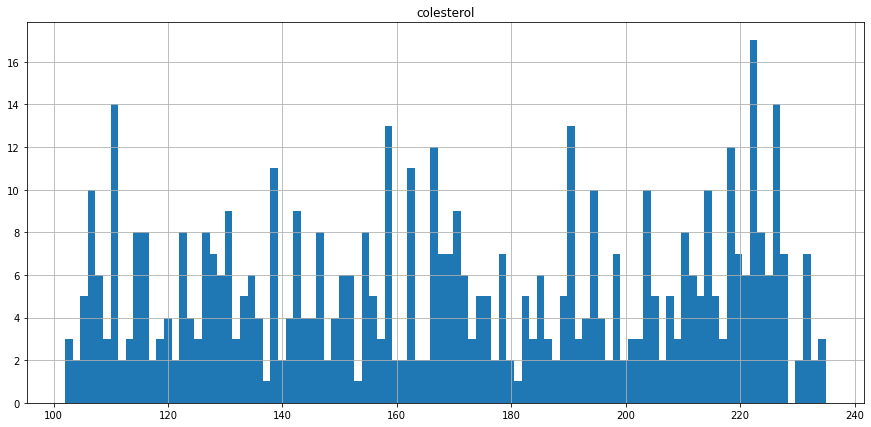

In [38]:
clientes.hist(column='colesterol', figsize=(15,7), bins=100)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f681c9f50d0>]],
      dtype=object)

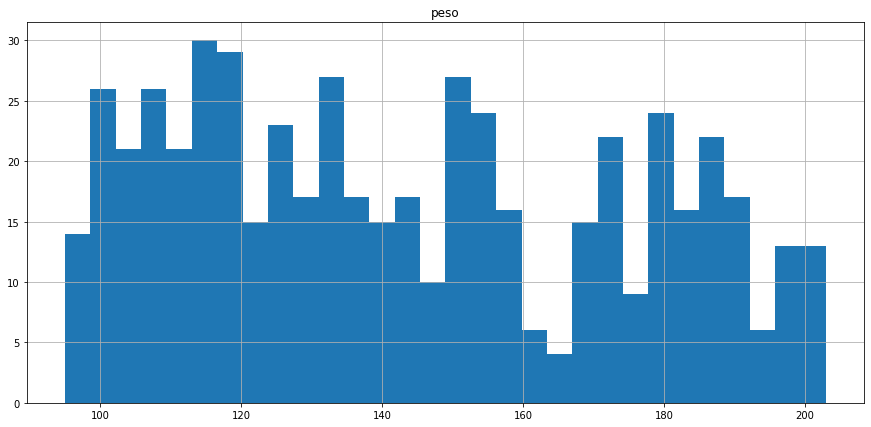

In [39]:
clientes.hist(column='peso', figsize=(15,7), bins=30)

In [40]:
clientes['colesterol'].mean()

170.28044280442805

# Junção das base de dados

In [41]:
estados[:5]

,id_estado,estado,sigla_estado,pais
0,1,Acre,ac,Brasil
1,2,Alagoas,al,Brasil
2,3,Amapá,ap,Brasil
3,4,Amazonas,am,Brasil
4,5,Bahia,ba,Brasil


In [42]:
clientes[:5]

,id_cliente,peso,colesterol,genero,id_estado
0,1,102.0,111,Masculino,23
1,2,115.0,135,Masculino,7
2,3,115.0,136,Masculino,4
3,4,140.0,167,Feminino,24
4,5,130.0,158,Masculino,26


In [43]:
clientes_estados = pd.merge(clientes, estados, on='id_estado')
clientes_estados.sort_values('id_cliente')

,id_cliente,peso,colesterol,genero,id_estado,estado,sigla_estado,pais
0,1,102.0,111,Masculino,23,Roraima,rr,Brasil
17,2,115.0,135,Masculino,7,Distrito Federal,df,Brasil
39,3,115.0,136,Masculino,4,Amazonas,am,Brasil
64,5,130.0,158,Masculino,26,Sergipe,se,Brasil
83,6,198.0,227,Masculino,8,Espírito Santo,es,Brasil
...,...,...,...,...,...,...,...,...
418,543,172.0,207,Masculino,22,Rondônia,ro,Brasil
430,544,129.0,157,Masculino,1,Acre,ac,Brasil
155,545,107.0,115,Masculino,6,Ceará,ce,Brasil
372,546,117.0,147,Masculino,20,Rio Grande do Norte,rn,Brasil


In [44]:
base_completa = pd.merge(clientes_estados, idade, on='id_cliente').sort_values('id_cliente')

In [45]:
base_completa = base_completa.reset_index(drop=True)

In [46]:
base_completa

,id_cliente,peso,colesterol,genero,id_estado,estado,sigla_estado,pais,idade
0,1,102.0,111,Masculino,23,Roraima,rr,Brasil,17
1,2,115.0,135,Masculino,7,Distrito Federal,df,Brasil,28
2,3,115.0,136,Masculino,4,Amazonas,am,Brasil,62
3,5,130.0,158,Masculino,26,Sergipe,se,Brasil,44
4,6,198.0,227,Masculino,8,Espírito Santo,es,Brasil,17
...,...,...,...,...,...,...,...,...,...
493,543,172.0,207,Masculino,22,Rondônia,ro,Brasil,20
494,544,129.0,157,Masculino,1,Acre,ac,Brasil,66
495,545,107.0,115,Masculino,6,Ceará,ce,Brasil,36
496,546,117.0,147,Masculino,20,Rio Grande do Norte,rn,Brasil,57


# Analise dos dados

In [47]:
from sklearn.cluster import KMeans

In [48]:
def calcular_wcss(dados_cliente):
  wcss = []
  for k in range(1,11):
    kmeans = KMeans(n_clusters = k, random_state=0)
    kmeans.fit(X=dados_cliente)
    wcss.append(kmeans.inertia_)
  return wcss

In [49]:
dados_cliente =  base_completa[['peso', 'colesterol']]
dados_cliente = dados_cliente.reset_index(drop=True)
dados_cliente.head()

,peso,colesterol
0,102.0,111
1,115.0,135
2,115.0,136
3,130.0,158
4,198.0,227


In [50]:
wcss_clientes = calcular_wcss(dados_cliente)

In [51]:
for i in range(len(wcss_clientes)):
  print(f'O cluster {i} possui valor de WCSS de: {wcss_clientes[i]}')

O cluster 0 possui valor de WCSS de: 1248240.6686746986
O cluster 1 possui valor de WCSS de: 298932.7377352369
O cluster 2 possui valor de WCSS de: 127842.60787249672
O cluster 3 possui valor de WCSS de: 73809.93553059456
O cluster 4 possui valor de WCSS de: 49068.8738718445
O cluster 5 possui valor de WCSS de: 34064.50002100837
O cluster 6 possui valor de WCSS de: 25079.92393550797
O cluster 7 possui valor de WCSS de: 20378.05126656164
O cluster 8 possui valor de WCSS de: 16003.657266380145
O cluster 9 possui valor de WCSS de: 13385.38391038145


Visualizando o grafico do cotovelo

In [52]:
import plotly.express as px
import plotly.offline as py
import plotly.graph_objects as go

In [53]:
grafico_wcss = px.line(x = range(1,11), y=wcss_clientes)
fig = go.Figure(grafico_wcss)
fig.update_layout(title='Calculando o WCSS', xaxis_title='Numero de Clusters', 
                  yaxis_title='Valor do WCSS', template = 'plotly_white')

In [54]:
kmeans_clientes = KMeans(n_clusters=4, random_state=0)
base_completa['cluster'] = kmeans_clientes.fit_predict(dados_cliente)

In [55]:
base_completa

,id_cliente,peso,colesterol,genero,id_estado,estado,sigla_estado,pais,idade,cluster
0,1,102.0,111,Masculino,23,Roraima,rr,Brasil,17,2
1,2,115.0,135,Masculino,7,Distrito Federal,df,Brasil,28,2
2,3,115.0,136,Masculino,4,Amazonas,am,Brasil,62,2
3,5,130.0,158,Masculino,26,Sergipe,se,Brasil,44,1
4,6,198.0,227,Masculino,8,Espírito Santo,es,Brasil,17,0
...,...,...,...,...,...,...,...,...,...,...
493,543,172.0,207,Masculino,22,Rondônia,ro,Brasil,20,0
494,544,129.0,157,Masculino,1,Acre,ac,Brasil,66,1
495,545,107.0,115,Masculino,6,Ceará,ce,Brasil,36,2
496,546,117.0,147,Masculino,20,Rio Grande do Norte,rn,Brasil,57,1


# Calculando os centroides de cada cluster

In [56]:
centroides_clusters = kmeans_clientes.cluster_centers_
centroides_clusters

array([[184.32394366, 218.98591549],
       [127.57024793, 154.20661157],
       [106.90697674, 119.57364341],
       [152.32075472, 186.03773585]])

In [57]:
grafico = px.scatter(x = base_completa['colesterol'], y = base_completa['peso'],
                     color= base_completa['cluster'])

grafico_centroide = px.scatter(x = centroides_clusters[:,0], 
                               y = centroides_clusters[:,1], size=[7,7,7,7])

grafico_final_petala = go.Figure(data = grafico.data + grafico_centroide.data)
grafico_final_petala.show()

# Criando função para gerar graficos

In [58]:
def plotar_grafico(x, y, x_label, y_label):
  grafico = px.scatter(x = x, y = y, color= base_completa['cluster'])
  fig = go.Figure(grafico)
  fig.update_layout(title='Analise de Cluster', xaxis_title=x_label, yaxis_title=y_label)
  fig.show()

# Segmentando os clientes baseado na analise dos clusters

In [59]:
x = 'colesterol'
y = 'peso'

plotar_grafico(base_completa[x], base_completa[y], x, y)

In [60]:
cluster_clientes = base_completa

In [61]:
cluster_clientes.loc[cluster_clientes['cluster']==0, 'nome_cluster'] = 'Alto Risco'
cluster_clientes.loc[cluster_clientes['cluster']==3, 'nome_cluster'] = 'Risco Moderado Alto'
cluster_clientes.loc[cluster_clientes['cluster']==1, 'nome_cluster'] = 'Risco Moderado Baixo'
cluster_clientes.loc[cluster_clientes['cluster']==2, 'nome_cluster'] = 'Baixo Risco'

In [62]:
cluster_clientes

,id_cliente,peso,colesterol,genero,id_estado,estado,sigla_estado,pais,idade,cluster,nome_cluster
0,1,102.0,111,Masculino,23,Roraima,rr,Brasil,17,2,Baixo Risco
1,2,115.0,135,Masculino,7,Distrito Federal,df,Brasil,28,2,Baixo Risco
2,3,115.0,136,Masculino,4,Amazonas,am,Brasil,62,2,Baixo Risco
3,5,130.0,158,Masculino,26,Sergipe,se,Brasil,44,1,Risco Moderado Baixo
4,6,198.0,227,Masculino,8,Espírito Santo,es,Brasil,17,0,Alto Risco
...,...,...,...,...,...,...,...,...,...,...,...
493,543,172.0,207,Masculino,22,Rondônia,ro,Brasil,20,0,Alto Risco
494,544,129.0,157,Masculino,1,Acre,ac,Brasil,66,1,Risco Moderado Baixo
495,545,107.0,115,Masculino,6,Ceará,ce,Brasil,36,2,Baixo Risco
496,546,117.0,147,Masculino,20,Rio Grande do Norte,rn,Brasil,57,1,Risco Moderado Baixo


# Analise dos Clusters criados

Verificar os valores de idade por cluster:

In [63]:
cluster_clientes.groupby('nome_cluster')['idade'].describe()

,count,mean,std,min,25%,50%,75%,max
nome_cluster,,,,,,,,
Alto Risco,142.0,43.204225,15.208965,16.0,32.00,42.5,56.00,69.0
Baixo Risco,129.0,43.139535,15.428132,17.0,30.00,41.0,58.00,70.0
Risco Moderado Alto,106.0,42.716981,15.355318,16.0,29.25,44.0,54.75,70.0
Risco Moderado Baixo,121.0,42.347107,14.411633,17.0,30.00,41.0,54.00,70.0


Verifica os valores de estado por cluster:

In [64]:
cluster_clientes.groupby('nome_cluster')['estado'].describe()

,count,unique,top,freq
nome_cluster,,,,
Alto Risco,142,25,Rio Grande do Sul,10
Baixo Risco,129,25,Amazonas,10
Risco Moderado Alto,106,25,Pernambuco,7
Risco Moderado Baixo,121,25,Sergipe,9


Verifica os valores de peso por cluster:

In [65]:
cluster_clientes.groupby('nome_cluster')['peso'].describe()

,count,mean,std,min,25%,50%,75%,max
nome_cluster,,,,,,,,
Alto Risco,142.0,184.323944,9.764278,167.0,176.25,184.0,191.0,203.0
Baixo Risco,129.0,106.906977,6.313975,95.0,102.00,107.0,112.0,118.0
Risco Moderado Alto,106.0,152.320755,7.023155,140.0,147.25,152.0,157.0,169.0
Risco Moderado Baixo,121.0,127.570248,6.971163,115.0,122.00,128.0,133.0,142.0


Verifica os valores de colesterol por cluster:

In [66]:
cluster_clientes.groupby('nome_cluster')['colesterol'].describe()

,count,mean,std,min,25%,50%,75%,max
nome_cluster,,,,,,,,
Alto Risco,142.0,218.985915,8.086400,204.0,213.00,220.0,225.0,235.0
Baixo Risco,129.0,119.573643,10.292424,102.0,110.00,120.0,129.0,138.0
Risco Moderado Alto,106.0,186.037736,9.760879,168.0,177.25,187.5,194.0,203.0
Risco Moderado Baixo,121.0,154.206612,9.776602,138.0,146.00,155.0,163.0,171.0


Verificação por genero:

In [67]:
cluster_clientes.groupby(['nome_cluster', 'genero'])['colesterol'].describe()

count        mean        std    min     25%  \
nome_cluster         genero                                                   
Alto Risco           Feminino    60.0  220.650000   6.456701  204.0  216.75   
                     Masculino   82.0  217.768293   8.939162  204.0  211.00   
Baixo Risco          Feminino    58.0  122.448276  10.372319  102.0  113.00   
                     Masculino   71.0  117.225352   9.677953  102.0  109.00   
Risco Moderado Alto  Feminino    59.0  186.152542  10.182496  168.0  176.00   
                     Masculino   47.0  185.893617   9.311596  172.0  178.00   
Risco Moderado Baixo Feminino    63.0  156.571429   9.596226  138.0  149.00   
                     Masculino   58.0  151.637931   9.389614  138.0  143.25   

                                  50%    75%    max  
nome_cluster         genero                          
Alto Risco           Feminino   221.0  225.0  235.0  
                     Masculino  219.0  225.0  235.0  
Baixo Risco          Feminino   124.5  130.0  138.0  
                     Masculino  115.0  126.0  136.0  
Risco Moderado Alto  Feminino   189.0  194.5  201.0  
                     Masculino  184.0  192.5  203.0  
Risco Moderado Baixo Feminino   156.0  166.0  171.0  
                     Masculino  151.5  158.0  168.0

# Exportando Dados

In [68]:
cluster_clientes.to_csv('classificacao_clientes.csv', sep = ';', encoding='latin1')